#  Naive Bayes - Tennis Dataset

IMPORTING THE DATA SCIENCE LIBRARIES

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time

Importing the ML / Scikit learn EVERYTHING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import train_test_split               #for splitting the data into test and training data
from sklearn.compose import ColumnTransformer                       #for transforming the columns
from sklearn.impute import SimpleImputer                             #for imputing the missing values
from sklearn.preprocessing import OneHotEncoder                      #one hot encoding
from sklearn.preprocessing import MinMaxScaler                        #standard scaling

from sklearn.datasets import load_diabetes

from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.svm import SVR
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_classification

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                 # for accuracy score
from sklearn.model_selection import cross_val_score        # for cross validation score

from sklearn.linear_model import LinearRegression           # Import the LinearRegression class
from sklearn.metrics import mean_squared_error, r2_score    # to find out the error functions
from sklearn.preprocessing import PolynomialFeatures , StandardScaler   # for the polunomial features

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge   # ridge Regression
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeClassifier                 #Decision tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier   # bagging and Boosting
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score   # different metrices to check how our model performed

Importing Deep learning Everything

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

Importing mathematical models

In [ ]:
# prompt: import the mathematical testing framewroks

# Importing mathematical models
import math

from scipy import stats

import scipy.stats as stats
import statsmodels.api as sm

# Loading and Information about the Dataset

In [ ]:

from google.colab import files    # we are importing the file from the device
uploaded = files.upload()

Categorical encoding has already being performed

In [ ]:
df=pd.read_csv('play_tennis.csv')   #fitting the data in the df dataframe
df.head(5)



In [ ]:
df.shape


In [ ]:
df.describe()

In [ ]:
df.info()       # we are checking for the null values luckily we dont have any here

 There is no null data present in our Dataset

# Data Preprocessing

In [ ]:
df.duplicated().sum()          # Checking the Duplicate Columns

 #  Encoding the Categorical Values

In [ ]:
label_encoders = {}
categorical_columns = [            # these are the only 2 string type categorical values
    'outlook' , 'temp' , 'humidity' , 'wind' , 'play'
]

for col in categorical_columns:
    le = LabelEncoder()                         # we are label encoding the categorical values
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head()

# CAtegorical Features Analysis

In [ ]:
df = df.drop('day', axis=1)
df.head()

In [ ]:

categorical_columns = [            # these are the only 2 string type categorical values
    'outlook' , 'temp' , 'humidity' , 'wind' , 'play'
]


plt.figure(figsize=(20, 20))


for i, col in enumerate(categorical_columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(x=col, data=df , palette='Set1')
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Count')


plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Group by species and sex to count occurrences
df_grouped = df.groupby(['play', 'outlook']).size().reset_index(name='count')

# Plotting the barplot
sns.barplot(x='play', y='count', hue='outlook', data=df_grouped)

# Display the plot
plt.title('Outlook Count per Play')
plt.ylabel('Count')
plt.xlabel('play')
plt.xticks(rotation=45)  # Rotate species labels if needed
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Group by species and sex to count occurrences
df_grouped = df.groupby(['play', 'temp']).size().reset_index(name='count')

# Plotting the barplot
sns.barplot(x='play', y='count', hue='temp', data=df_grouped)

# Display the plot
plt.title('Temp Count per Play')
plt.ylabel('Count')
plt.xlabel('play')
plt.xticks(rotation=45)  # Rotate species labels if needed
plt.show()

In [ ]:
# Group by species and sex to count occurrences
df_grouped = df.groupby(['play', 'humidity']).size().reset_index(name='count')

# Plotting the barplot
sns.barplot(x='play', y='count', hue='humidity', data=df_grouped)

# Display the plot
plt.title('Humidity Count per Play')
plt.ylabel('Count')
plt.xlabel('Play')
plt.xticks(rotation=45)  # Rotate species labels if needed
plt.show()

In [ ]:
# Group by species and sex to count occurrences
df_grouped = df.groupby(['play', 'wind']).size().reset_index(name='count')

# Plotting the barplot
sns.barplot(x='play', y='count', hue='wind', data=df_grouped)

# Display the plot
plt.title('wind Count per Play')
plt.ylabel('Count')
plt.xlabel('Play')
plt.xticks(rotation=45)  # Rotate species labels if needed
plt.show()

# Correlation with the Exited

In [ ]:
COA_corr = pd.DataFrame(df.corr()['play'])
COA_corr.rename({'play': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('play', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Exited Correlation Coeffecients', size='30')
plt.show()

In [ ]:
COA_corr

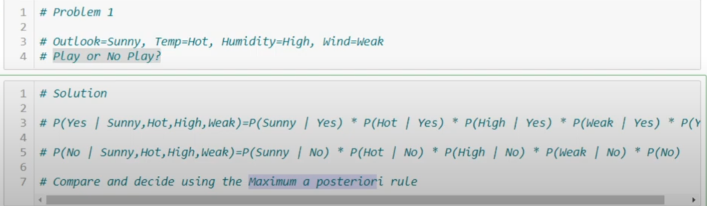

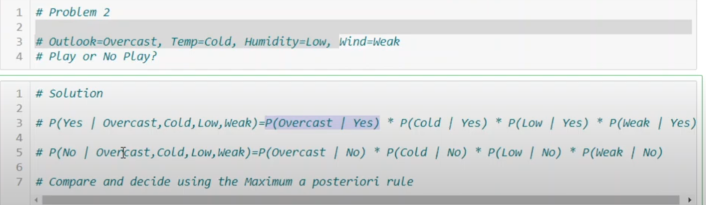

# Calculating the Conditional probablities - Bayes Theorem

In [ ]:
df['play'].value_counts()

In [ ]:
py = 9/14
ph = 5/14

print(py)
print(ph)

In [ ]:
#outlook

pd.crosstab(df['outlook'],df['play'])

In [ ]:
pon = 0
prn = 2/5
psn = 3/5

poy = 4/9
pry = 3/9
psy = 2/9



In [ ]:
#temp

pd.crosstab(df['temp'],df['play'])

In [ ]:
pcoolno = 1/5
photno = 2/5
pmildno = 2/5

pcoolywa = 3/9
photyes = 2/9
pmildyes = 4/9

In [ ]:
#humidity

pd.crosstab(df['humidity'],df['play'])

In [ ]:
phighno = 4/5
pnormalno = 1/5

phighyes = 3/9
pnormalyes = 6/9

In [ ]:
#wind

pd.crosstab(df['wind'],df['play'])

In [ ]:
pstrongno = 3/5
pweakno = 2/5

pstrongyes = 3/9
pweakyes = 6/ 9

# Solving The problem

In [ ]:
#Outlook = Sunny  , Temp = Hot , Humidity=High , wind=weak

p_yes = py*psy*pcoolywa*phighyes*pweakyes
p_no = ph*psn*pcoolno*phighno*pstrongno

print(p_yes)
print(p_no)